# Ariline Customer Satisfaction (Lab #1: DS7331)

SMU Student collaboration:
1. Renfeng Wang
2. Alexander Sepenu
3. Zachary Zaiken
4. Venkata 'MG' Vanga
---------------------------------------------

## 1.0 Business Understanding

The data used in this analysis is from the "Airline Passenger Satisfaction" dataset sourced from Kaggle. 

https://www.kaggle.com/binaryjoker/airline-passenger-satisfaction.  
        
This dataset comes from a survey that measured Airline passenger satisfaction and to understand the various factors that contribute to airline passenger perceived level of satisfaction. The survey was conducted to gather data so the airline companies could improve on Quality of Service (QoS) that will meet the expectations of passengers and help these companies stay competitive within the industry. The model when built will help these companies' direct resources that will target specific attributes to improve on services hence saving them millions of dollars that would otherwise gone to a gamut of service improvement campaigns. The dataset can be leveraged into a supervised machine learning classification model that can predict customer satisfaction for this dataset set as well as predict future flights experiences based on attributes and datapoints used.

Statistical models that can be used for the desired outcome for this analysis include PCA as a dimensionality reduction method to reduce the dimensionality of the variables in this large data sets into a smaller one that still contains most of the information, we will need Logistic regression, random forests, naive-bayes, KNN or LDA/QDA will also be employed. The expected outcome of such a model after dimensionality reduction would be to correctly predict a passenger’s flight satisfaction description from training/test set split or 10-fold cross validation while maintaining high and consistent measurement for overall model accuracy, sensitivity and specificity.  Other variables that could be predicted could be continuous such as flight distance.  In this case other cross validation metrics such as root mean squared error, Test ASE or AIC can be used to verify a regression model.

Cross validation steps will ensure that the model was not overfitted based on training data and will work for future data that has either not yet been collected or where all other attributes are known but not satisfaction. By maximizing both sensitivity and specificity the model is robust to a skewed sample or dataset, the number of false positives is just as important as the ones that were matched correctly. In addition, by running several classification models we can ensure that multi approaches were taken and tested out before a model its accuracy statistics are deemed final.


In this Lab 1 we mainly focus on visualizing the dataset, EDA and doing the PCA (Principal Component Analysis).
Further during the course, the dataset can be leveraged into machine learning classification model that can predict customer satisfaction for this dataset, as well provide more prediction of flight distance and satisfaction relationship.

---------------------------------------------
The data was downloaded from Kaggle as CSV, then we imported Airline passenger data from github into Ipython notebook.

In [1]:
import pandas as pd
import numpy as np
# read in the csv file
airline_df = pd.read_csv('https://raw.githubusercontent.com/wangrenfeng0/Machine-Learning-I/main/airline_passenger_satisfaction.csv') 

-------
-------
## 2.0 Data Meaning Type

#### Below table shows all the data types, attributes' descriptions and scale of values for the dataset. 

- Continuous Variables are highlighted in light gray
- Ordinal variables highlighted in light blue and 
- Categorical variables are shown in white color.

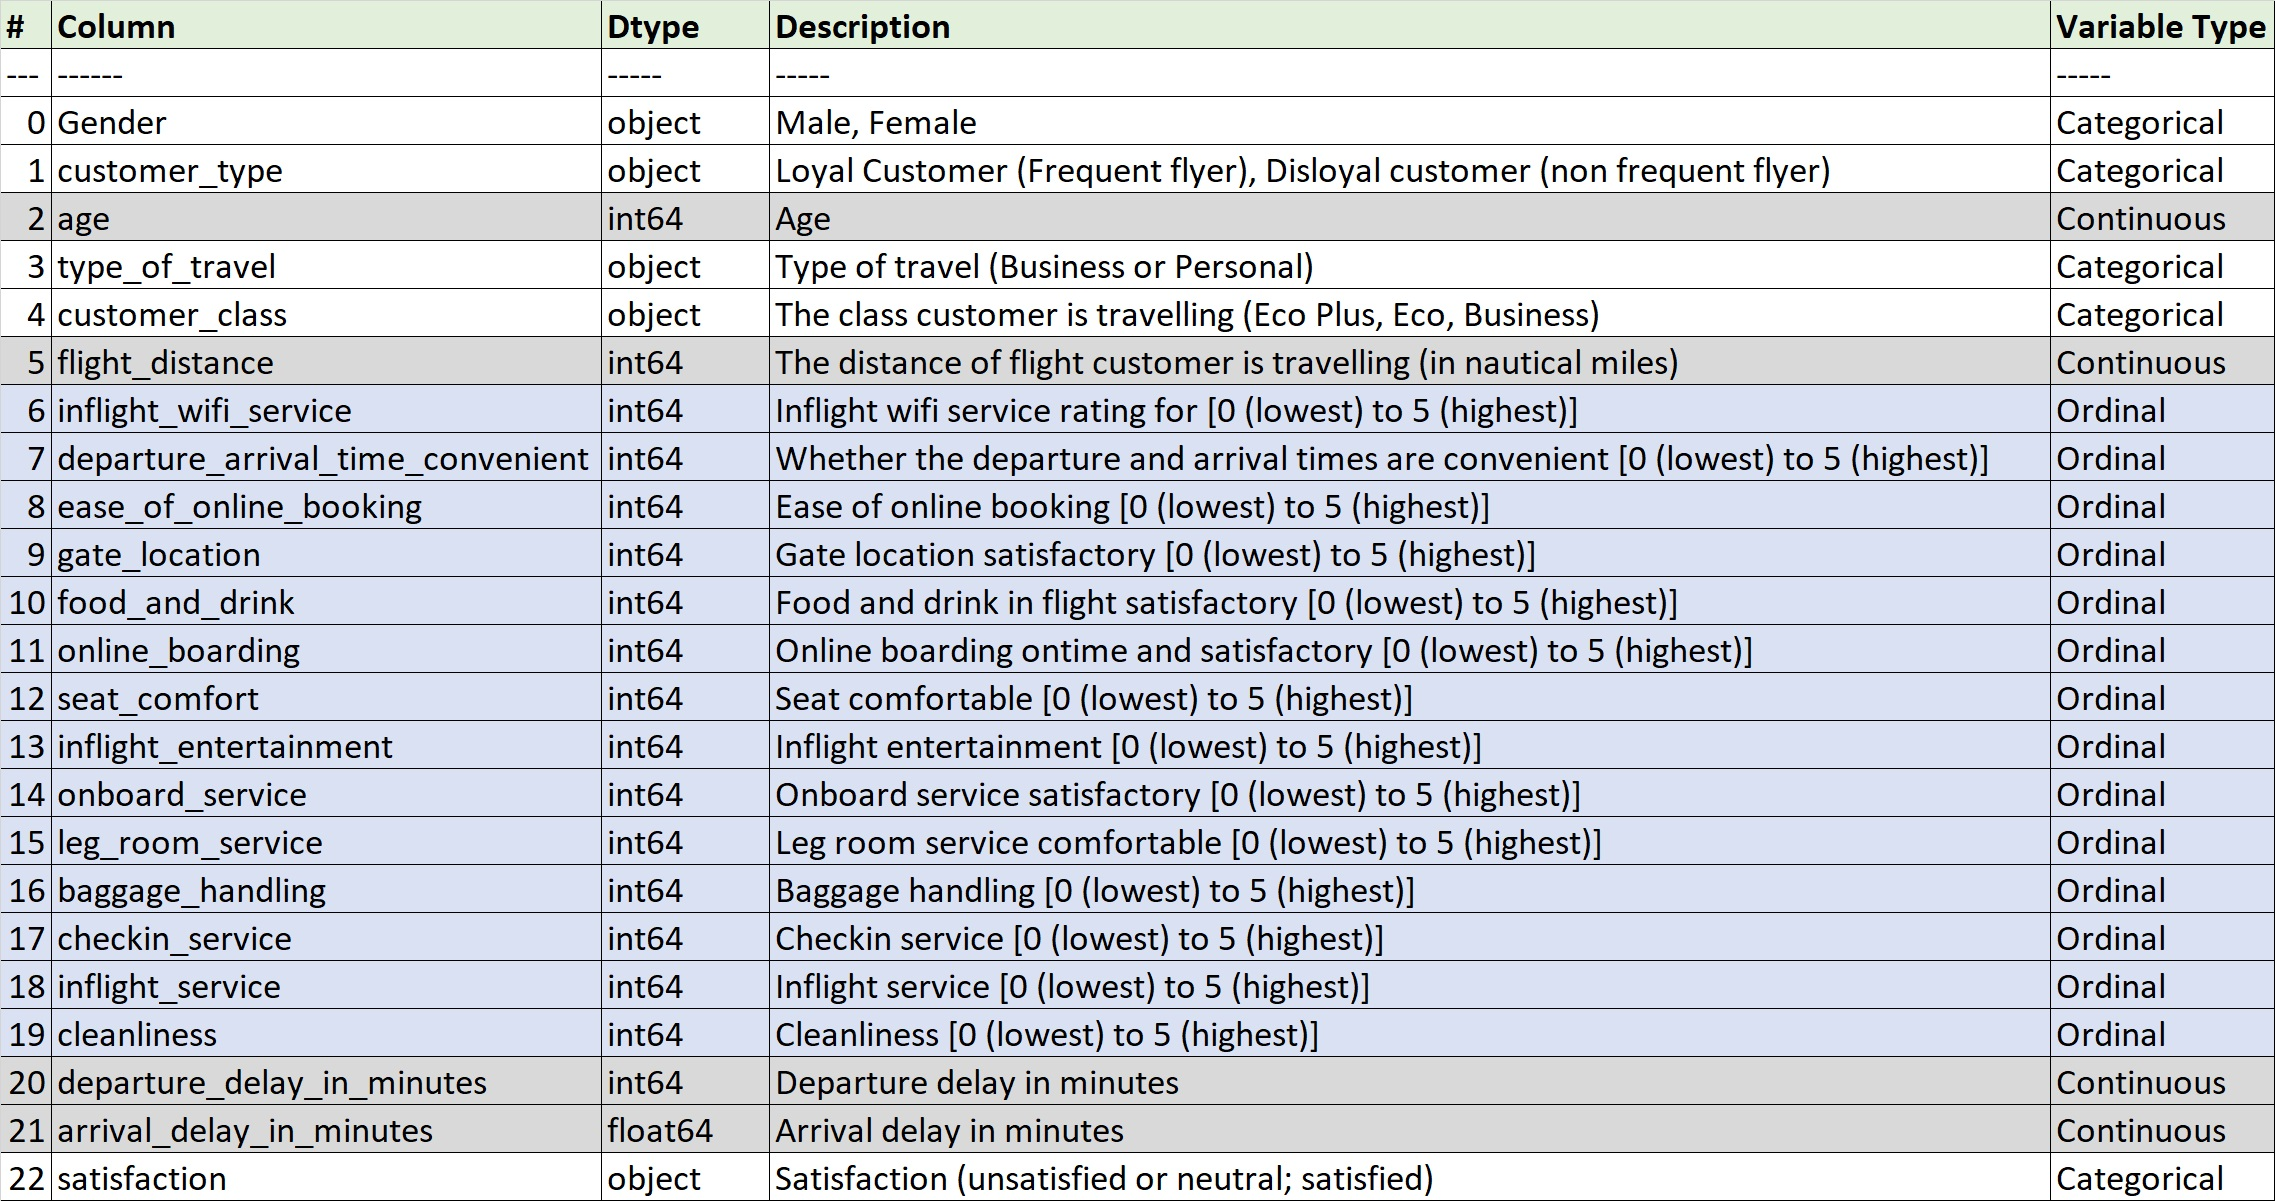

Visualizing the dataset using dataframe head.

In [2]:
airline_df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


We can observe from the above table that there are 24 attributes in the dataset. 
'Unnamed:0' being the ID of the each row. 
We delete this attribute and continue with Exploratory Data Analysis (EDA) for the remaining 23 attributes.

In [3]:
if 'Unnamed: 0' in airline_df:
    del airline_df['Unnamed: 0']

airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

---------------------------------------------
-------

## 3.0 Data Quality

### Data Cleansing:

It can be observed from Data meaning type that there are total 129,880 records of data in each of 23 variables except for variable:'arrival_delay_in_minutes' which only has 129,487 records (393 missing). 

The 393 missing values constitute about 0.3% of the total 'arrival_delay_in_minutes' count, since this is a such small count and may not have significant influence on final results, we are going to delete these rows and continue with our EDA.

In [4]:
airline_df = airline_df.dropna()
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   customer_type                      129487 non-null  object 
 2   age                                129487 non-null  int64  
 3   type_of_travel                     129487 non-null  object 
 4   customer_class                     129487 non-null  object 
 5   flight_distance                    129487 non-null  int64  
 6   inflight_wifi_service              129487 non-null  int64  
 7   departure_arrival_time_convenient  129487 non-null  int64  
 8   ease_of_online_booking             129487 non-null  int64  
 9   gate_location                      129487 non-null  int64  
 10  food_and_drink                     129487 non-null  int64  
 11  online_boarding                    1294

Entire dataset now only has 129,487 records for the EDA.

------


### Outlier detection/discussion:

#### Box plots for continuous variables:

<AxesSubplot:title={'center':'arrival_delay_in_minutes'}, xlabel='satisfaction'>

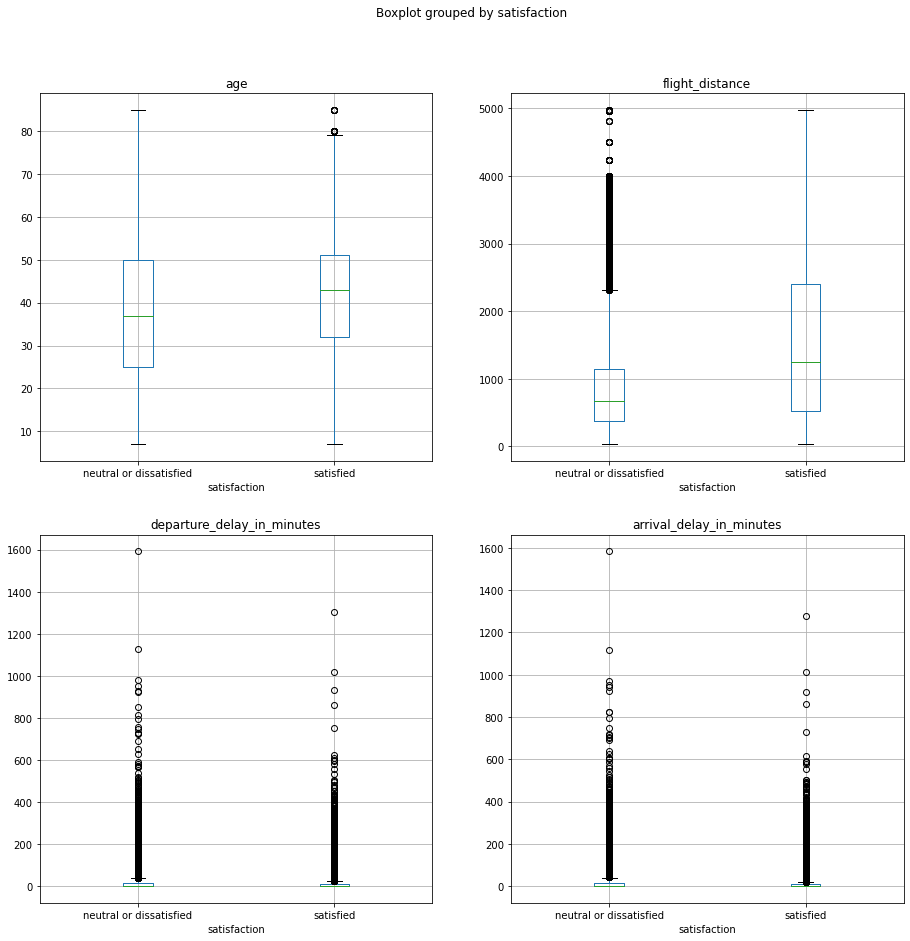

In [5]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

fig, axs = plt.subplots(nrows=2, ncols=2,figsize = (15,15))
airline_df.boxplot(column='age', by='satisfaction', ax=axs[0,0])
airline_df.boxplot(column='flight_distance', by='satisfaction',ax=axs[0,1])
airline_df.boxplot(column='departure_delay_in_minutes', by='satisfaction',ax=axs[1,0])
airline_df.boxplot(column='arrival_delay_in_minutes', by='satisfaction',ax=axs[1,1])


We have checked for outliers in the dataset by boxplots. The only variables are subjected to this analysis are four continuous variables (departure_delay_in_minutes, arrival_delay_in_minutes, flight distance and age). There appeared to be some outliers, but not until we fit some models, can we calculate Cook's D or leverage to idenitify and deal with them.  

For arrival and departure delay, the most common value is 0 min (i.e. no delay), as such any significant delay will be viewed as an outlier.  The team's approach here will be to cut and transform the 4 continuous variables into categorical variables.  For example age will be cut into child, adult and senior.  This removes the outliers and creates another variable to be used for classification prediction. Please see section 7 New Features for details.

Additional discussion for the outlier detection is shown below:

------

#### Using the 68–95–99 rule to detect Outliers 

Outliers:

Using the 68-95-99 rule, we can detect outliers in the various attribute. To explain this rule 68% of the data is within one standard deviation above or below the mean, and 95% of the data is within two standard deviations from the mean, also 99.7% of the data is within three standard deviations from the mean. With this rule of thumb only very few data points should be beyond three standard deviations from the mean, more precisely, only 0.3% of the data points. Therefore, any data point that is seen farther than three standard deviations is considered extreme and an outlier.

To check if a data point is an outlier and check if it falls farther than three standard deviations, we calculate:

Q1 – (1.5 * IQR)

Q3 + (1.5 * IQR)

These represent the lower and upper bounds of the area in the distribution that is not considered extreme. Which ends up being approximately 3 standard deviations from the mean. Hence, any data point lower than the lower bound or greater than the upper bound is an outlier and they are greater than the 3 standard deviations. 

Implying;
(ant data point value) < Q1– (1.5 * IQR), then it’s an outlier

(any data point value) > Q3 + (1.5 * IQR), then it’s an outlier

27.0
40.0
51.0
24.0
-9.0 87.0


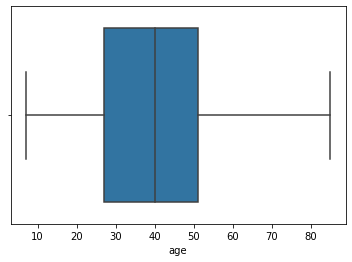

In [6]:
## checking for outliers in four of the continious predictors
### varying the predictors to visualize the outliers within the datasets

import seaborn as sns
sns.boxplot(data=airline_df,x=airline_df['age'])

Q1 = airline_df['age'].quantile(0.25)

Q2 = airline_df['age'].quantile(0.50)

Q3 = airline_df['age'].quantile(0.75)

IQR=Q3-Q1

print(Q1)  # First quartile

print(Q2)  # Second quartile

print(Q3)   # Third quartile

print(IQR)  # Inter quartile range Q3 - Q1


Lower_Whisker = Q1 - 1.5 * IQR 

Upper_Whisker = Q3 + 1.5 * IQR

print(Lower_Whisker, Upper_Whisker)

414.0
844.0
1744.0
1330.0
-1581.0 3739.0


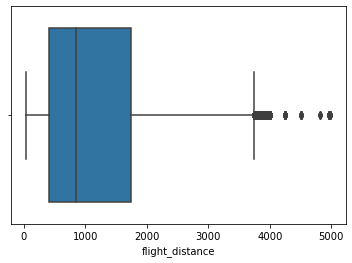

In [7]:
## checking for outliers in four of the continious predictors
### varying the predictors to visualize the outliers within the datasets

import seaborn as sns
sns.boxplot(data=airline_df,x=airline_df['flight_distance'])

Q1 = airline_df['flight_distance'].quantile(0.25)

Q2 = airline_df['flight_distance'].quantile(0.50)

Q3 = airline_df['flight_distance'].quantile(0.75)

IQR=Q3-Q1

print(Q1)  # First quartile

print(Q2)  # Second quartile

print(Q3)   # Third quartile

print(IQR)  # Inter quartile range Q3 - Q1


Lower_Whisker = Q1 - 1.5 * IQR 

Upper_Whisker = Q3 + 1.5 * IQR

print(Lower_Whisker, Upper_Whisker)

0.0
0.0
12.0
12.0
-18.0 30.0


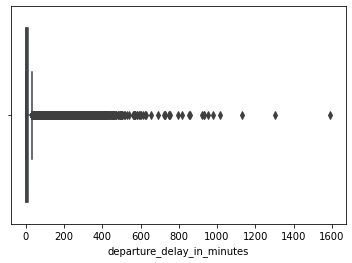

In [8]:
## checking for outliers in four of the continious predictors
### varying the predictors to visualize the outliers within the datasets

import seaborn as sns
sns.boxplot(data=airline_df,x=airline_df['departure_delay_in_minutes'])

Q1 = airline_df['departure_delay_in_minutes'].quantile(0.25)

Q2 = airline_df['departure_delay_in_minutes'].quantile(0.50)

Q3 = airline_df['departure_delay_in_minutes'].quantile(0.75)

IQR=Q3-Q1

print(Q1)  # First quartile

print(Q2)  # Second quartile

print(Q3)   # Third quartile

print(IQR)  # Inter quartile range Q3 - Q1


Lower_Whisker = Q1 - 1.5 * IQR 

Upper_Whisker = Q3 + 1.5 * IQR

print(Lower_Whisker, Upper_Whisker)

0.0
0.0
13.0
13.0
-19.5 32.5


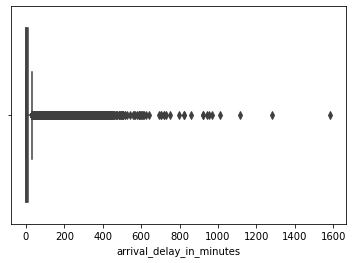

In [9]:
## checking for outliers in four of the continious predictors
### varying the predictors to visualize the outliers within the datasets

import seaborn as sns
sns.boxplot(data=airline_df,x=airline_df['arrival_delay_in_minutes'])

Q1 = airline_df['arrival_delay_in_minutes'].quantile(0.25)

Q2 = airline_df['arrival_delay_in_minutes'].quantile(0.50)

Q3 = airline_df['arrival_delay_in_minutes'].quantile(0.75)

IQR=Q3-Q1

print(Q1)  # First quartile

print(Q2)  # Second quartile

print(Q3)   # Third quartile

print(IQR)  # Inter quartile range Q3 - Q1


Lower_Whisker = Q1 - 1.5 * IQR 

Upper_Whisker = Q3 + 1.5 * IQR

print(Lower_Whisker, Upper_Whisker)

-----

#### Duplicate data detection:

In [10]:
#Duplicated data check
airline_df[airline_df.duplicated()]

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction


We observe that there are no duplicated records in the entire dataset. 

-----
-----

## 4.0 Simple Statistics


Grouping the variables by categorical, ordinal and continuous.

In [11]:
# let's start first by collecting the continuous features
airline_continuous_features = ['age', 'flight_distance', 
                       'departure_delay_in_minutes', 'arrival_delay_in_minutes']

# and then the ordinal features.
airline_ordinal_features = ['inflight_wifi_service','departure_arrival_time_convenient','gate_location',
                    'food_and_drink','online_boarding','seat_comfort','inflight_entertainment',
                    'onboard_service',  'leg_room_service' ,'baggage_handling' ,'checkin_service' ,  
                     'inflight_service','cleanliness']

# we won't modify these variables, keep them as categorical
airline_categ_features = ['Gender','customer_type','type_of_travel','customer_class','satisfaction'];


airline_continuous_features_satis = ['age', 'flight_distance', 
                       'departure_delay_in_minutes', 'arrival_delay_in_minutes','satisfaction']


airline_nonflight_ordinal_features_satis = ['gate_location','departure_arrival_time_convenient',
                    'online_boarding','baggage_handling' ,'checkin_service' , 'satisfaction']

In [12]:
# Normalize the continuous variables, and use them when it's necessary.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

airline_df_cont = airline_df[airline_continuous_features]

scaled_cont=airline_df_cont.copy()
scaled_cont=pd.DataFrame(scaler.fit_transform(scaled_cont), columns=scaled_cont.columns)
scaled_cont.head()

,age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes
0,-1.748219,-0.731999,0.273026,0.075623
1,-0.954439,-0.957550,-0.359673,-0.236345
2,-0.888290,-0.048329,-0.386036,-0.392329
3,-0.954439,-0.629749,-0.096049,-0.158353
4,1.426902,-0.978601,-0.386036,-0.392329


In [13]:
# Normalize the ordinal variables, and use them when it's necessary.
airline_df_ord = airline_df[airline_ordinal_features]
scaled_ord=airline_df_ord.copy()
scaled_ord=pd.DataFrame(scaler.fit_transform(scaled_ord), columns=scaled_ord.columns)
scaled_ord.head()

,inflight_wifi_service,departure_arrival_time_convenient,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
0,0.204220,0.617410,-1.546271,1.349963,-0.187111,1.181364,1.230701,0.479240,-0.266751,0.311941,0.547933,1.153847,1.304624
1,0.204220,-0.692535,0.018061,-1.657783,-0.187111,-1.850863,-1.767475,-1.851712,1.252860,-0.535461,-1.821471,0.303947,-1.740400
2,-0.548095,-0.692535,-0.764105,1.349963,1.293662,1.181364,1.230701,0.479240,-0.266751,0.311941,0.547933,0.303947,1.304624
3,-0.548095,1.272383,1.582393,-0.905846,-0.927497,-1.092806,-1.017931,-1.074728,1.252860,-0.535461,-1.821471,0.303947,-0.979144
4,0.204220,-0.037562,0.018061,0.598027,1.293662,1.181364,-0.268387,-0.297744,0.493055,0.311941,-0.241868,-0.545953,-0.217888


Summary of Variables:

In [14]:
airline_df[airline_continuous_features].describe()

,age,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes
count,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,14.643385,15.091129
std,15.117597,997.560954,37.932867,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


It is observed from the continuous variable summary that Min age in the data set is 7 year-old and max age is 85 year-old.

The minimum flight distance traveled is 31 nautical miles, the max distance traveled is 4983 nautical miles.

The max departure/arrival delays are around approx. 1580 min (26 hrs), but most of the data in these two variables are 0 which means the data is heavily skewed.


In [15]:
airline_df[airline_categ_features].describe()

,Gender,customer_type,type_of_travel,customer_class,satisfaction
count,129487,129487,129487,129487,129487
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65703,105773,89445,61990,73225


All categorical variables in this dataset have two or three selections and summary of these variables is shown above.

To visualize the statistical significance for categorical variables we have modified categorical variables as described below: (further explanation is in Section 5.0 Visualize Attributes). 

- 1. Gender:         Male as 1; Female as 0.
- 2. Customer Type:  Loyal as 1; Disloyal as 0.
- 3. Travel Type:    BusinessTravel as 0 and PersonalTravel as 1.
- 4. Customer Class: Eco as 0; Eco Plus as 1 and Business as 2.
- 5. Satisfaction:   neutral or dissatisfied as 0 and satisfied as 1.


In [16]:
airline_df[airline_ordinal_features].describe()

,inflight_wifi_service,departure_arrival_time_convenient,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,2.728544,3.057349,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222
std,1.329235,1.526787,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


All ordinal features are survey from 0 (lowest rating) to 5 (highest rating). Most ordinal variables have mean and median around 3 which suggests normal distribution in ordinal variables.

-----
-----

## 5.0 Visualize Attributes

In this section we visualze the different variables in the dataset and the importance of the variables in determining the satisfaction criteria.

In [17]:
airline_df['age_range'] = pd.cut(airline_df.age,[0,16,65,120],3,labels=['child','adult','senior'])
airline_df.age_range.describe()

gender={'Male':1,'Female':0}
Customer_Type={'Loyal Customer':1,'disloyal Customer':0}
Type_of_Travel={'Personal Travel':1, 'Business travel':0}
Customer_Class = {'Eco':0,'Eco Plus':1,'Business':2}
Satisfaction ={'neutral or dissatisfied':0,'satisfied':1}
airline_df.Gender = [gender[item] for item in airline_df.Gender]
airline_df.customer_type = [Customer_Type[item] for item in airline_df.customer_type]
airline_df.type_of_travel = [Type_of_Travel[item] for item in airline_df.type_of_travel]
airline_df.customer_class = [Customer_Class[item] for item in airline_df.customer_class]
airline_df.satisfaction = [Satisfaction[item] for item in airline_df.satisfaction]
airline_df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,age_range
0,1,1,13,1,1,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,0,child
1,1,0,25,0,2,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,0,adult
2,0,1,26,0,2,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,1,adult
3,0,1,25,0,2,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,0,adult
4,1,1,61,0,2,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,1,adult


Above table shows the modified variables imputed into the main dataframe. Age range is imputed as the last variable in the table.

#### -- Satisfaction ('neutral or dissatisfied' or 'satisfied') percentage in the total dataset

In [18]:
airline_grouped1 = airline_df.groupby(by=['satisfaction'])
print('Percentage of satisfaction in the total dataset:')
print(airline_grouped1.age.count()/len(airline_df)*100)

Percentage of satisfaction in the total dataset:
satisfaction
0    56.550078
1    43.449922
Name: age, dtype: float64


The satisfaction percentage in the total dataset is approx. 57%-43% distributed between 'neutral or dissatisfied' and 'satisfied', this can result in unbiased distribution while doing the train/test split and classification of the satisfaction rating from the customers.

-----

#### -- Age_range percentage in the total dataset

In [19]:
airline_grouped0 = airline_df.groupby(by=['age_range'])
print('Percentage of age range in the total dataset:')
print(airline_grouped0.age.count()/len(airline_df)*100)

Percentage of age range in the total dataset:
age_range
child      6.633098
adult     89.480025
senior     3.886877
Name: age, dtype: float64


It can be observed that the entire dataset consists of 89.5% adults and 6.6% children and 3.9% seniors. We see more bias towards the adult category, these percentages follow the general trend that are followed in regular airline passengers travelling.

The test/training split that will be considered for classificaton of the satisfaction rating should be made sure that there need to be an unbiased dataset.

-----

#### -- Satisfaction categorized by customer_type,  Loyal as '1'; Disloyal as '0' grouped with age_range

satisfaction                False     True 
customer_type age_range                    
0             child      0.781690  0.218310
              adult      0.758049  0.241951
              senior     0.864486  0.135514
1             child      0.854421  0.145579
              adult      0.480348  0.519652
              senior     0.813032  0.186968


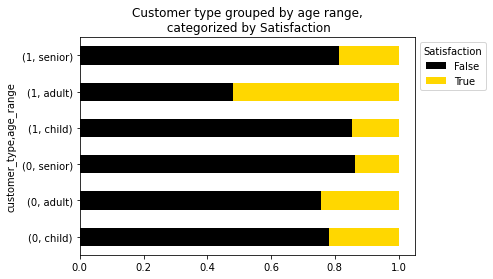

In [20]:
satisfaction_counts = pd.crosstab([airline_df['customer_type'],
                                   airline_df['age_range']],airline_df.satisfaction.astype(bool))
satisfaction_rates = satisfaction_counts.div(satisfaction_counts.sum(1).astype(float),axis=0)
print(satisfaction_rates)
satisfaction_rates.plot(kind='barh',stacked=True,color=['black','gold'])
plt.title('Customer type grouped by age range,\n categorized by Satisfaction')
plt.legend(title='Satisfaction', bbox_to_anchor=(1,1), loc=2)

To access that customer_type (loyal, disloyal) role in the satisfaction rating from the customer we used the above stacked bar plot. It is interesting to note that the children and seniors for both loyal and disloyal groups had higher percentages of neutral or dissatisfied rating. The adults had a approx. 50-50 percentage split for loyal type and approx. 75(neutral or dissatisfied) - 25(satisfied) percentage split for disloyal type.

Choosing customer type as criteria would mostly yield higher 'neutral or dissatisfied' rating

--------------------------------

#### -- Satisfaction categorized by gender,  Female as 0; Male as 1.

satisfaction         False     True 
Gender age_range                    
0      child      0.846774  0.153226
       adult      0.539894  0.460106
       senior     0.821275  0.178725
1      child      0.842787  0.157213
       adult      0.527822  0.472178
       senior     0.808966  0.191034


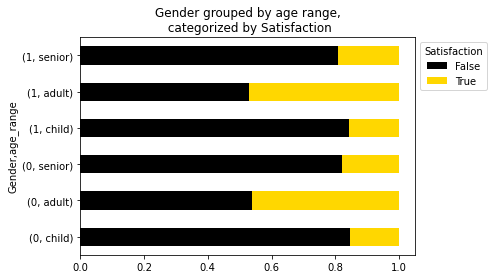

In [21]:
satisfaction_counts = pd.crosstab([airline_df['Gender'],airline_df['age_range']],airline_df.satisfaction.astype(bool))
satisfaction_rates = satisfaction_counts.div(satisfaction_counts.sum(1).astype(float),axis=0)
print(satisfaction_rates)
satisfaction_rates.plot(kind='barh',stacked=True,color=['black','gold'])
plt.title('Gender grouped by age range,\n categorized by Satisfaction')
plt.legend(title='Satisfaction', bbox_to_anchor=(1,1), loc=2)

Both male and female adults show the almost same satisfaction percentage (approx. 46%).

Similarly both male and female child categories show the lowest satisfaction percentage (apporx. 15%).

-- It is interesting to see that the children are the least satisfied. 

#### We can suggest the airline industry to focus more on children so that they inturn persuade the adults resulting more air travel.

Airline industry should also tend the focus towards the seniors to increase the satisfaction level as the satisfaction level of seniors (17-19%) is not far from children (approx. 15%).

------

#### -- Satisfaction categorized by travel_type,  Business as 0; PersonalTravel as 1.

satisfaction                 False     True 
type_of_travel age_range                    
0              child      0.694892  0.305108
               adult      0.403422  0.596578
               senior     0.662887  0.337113
1              child      0.897436  0.102564
               adult      0.897784  0.102216
               senior     0.910766  0.089234


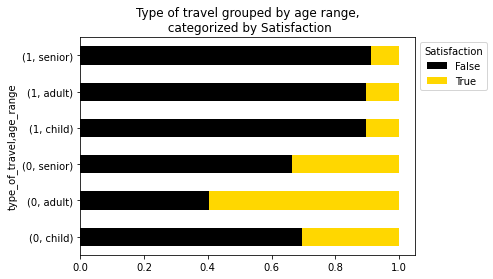

In [22]:
satisfaction_counts = pd.crosstab([airline_df['type_of_travel'],airline_df['age_range']],airline_df.satisfaction.astype(bool))
satisfaction_rates = satisfaction_counts.div(satisfaction_counts.sum(1).astype(float),axis=0)
print(satisfaction_rates)
satisfaction_rates.plot(kind='barh',stacked=True,color=['black','gold'])
plt.title('Type of travel grouped by age range,\n categorized by Satisfaction')
plt.legend(title='Satisfaction', bbox_to_anchor=(1,1), loc=2)

Considering the type of travel as the factor for satisfaction classification, it is observed except for adults with business travel type 60-40 percentage all the other factors children, senior in both personal and business travel tend to more biased toward 'neutral or dissatisfied' in satisfaction rating. This can also be combined with class as shown below as most adults travelling for Bussiness would be travelling business class and have high satisfaction rating.

--------------------------------

#### -- Satisfaction categorized by class,  Eco as 0; Eco Plus as 1 and Business as 2.

satisfaction                 False     True 
customer_class age_range                    
0              child      0.885705  0.114295
               adult      0.798644  0.201356
               senior     0.879100  0.120900
1              child      0.891046  0.108954
               adult      0.730725  0.269275
               senior     0.846552  0.153448
2              child      0.620818  0.379182
               adult      0.290496  0.709504
               senior     0.653760  0.346240


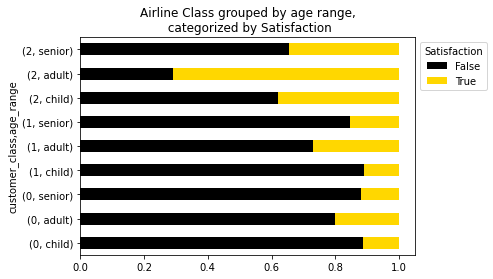

In [23]:
satisfaction_counts = pd.crosstab([airline_df['customer_class'],airline_df['age_range']],airline_df.satisfaction.astype(bool))
satisfaction_rates = satisfaction_counts.div(satisfaction_counts.sum(1).astype(float),axis=0)
print(satisfaction_rates)
satisfaction_rates.plot(kind='barh',stacked=True,color=['black','gold'])
plt.title('Airline Class grouped by age range,\n categorized by Satisfaction')
plt.legend(title='Satisfaction', bbox_to_anchor=(1,1), loc=2)

There is a sharp satisfaction rate jump for all age groups when flight class changes from Eco/Eco Plus (0,1) to Business(2). 
 
 #### Airlines should focus more on Eco, Eco Plus services to increase the satisfaction percentage. 
 #### We also noticed that there are slightly satisfaction rate decreases when flight class changes from Eco to Eco Plus. Based on our own airline experience, the services of Eco and Eco Plus don't have any differences, but price of flight ticket for Eco Plus is more experience than Eco which we doubt this is the main reason of satisfaction rate decreases.
 
 ------------

The cumulative densitve function (CDF) plots for continuous variables are shown below:

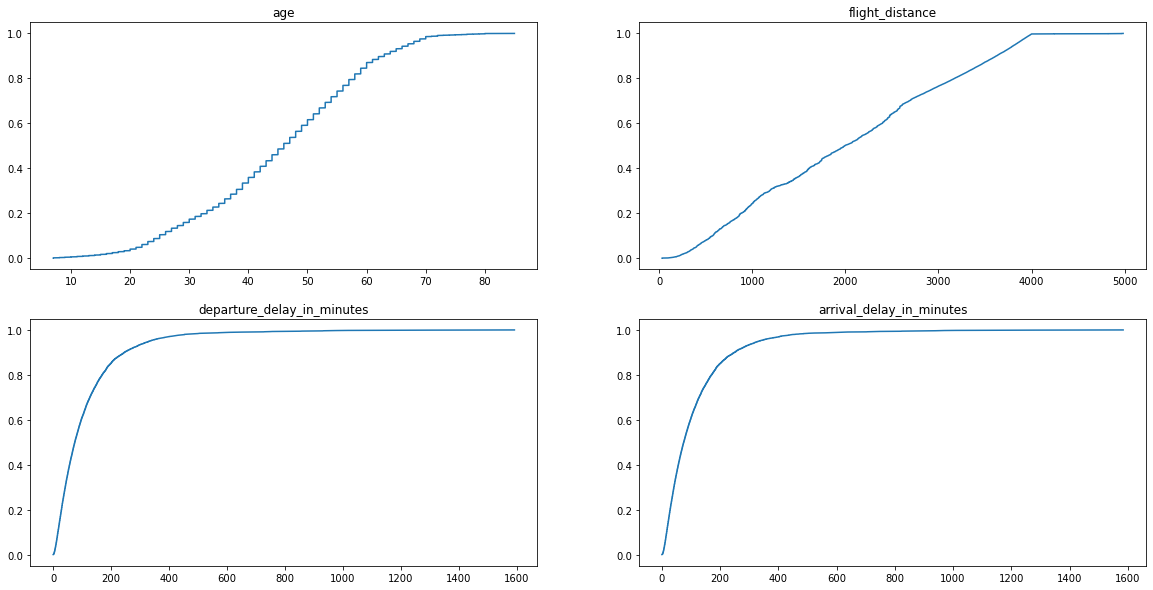

In [24]:
# make empirical CDFs
plt.figure(figsize=(20,10))
for fi,feature in enumerate(['age','flight_distance','departure_delay_in_minutes','arrival_delay_in_minutes']):
    plt.subplot(2,2,fi+1)
    x_ax = np.sort(airline_df[feature])
    y_ax = np.cumsum(x_ax)
    y_ax = y_ax/np.max(y_ax)
    plt.plot(x_ax,y_ax)
    plt.title(feature)
    
plt.show()

The CDF plots of four continuous varialbes show that:
Customers' ages are mostly distributed between 20 to 70. The flight distance is mostly(95%) within 4000 nautical miles. The departure/arrival delay time are mostly (90%) within 200 minutes.

-----
-----

## 6.0 Explore Joint Attributes

#### Pair plots for continuous variables:

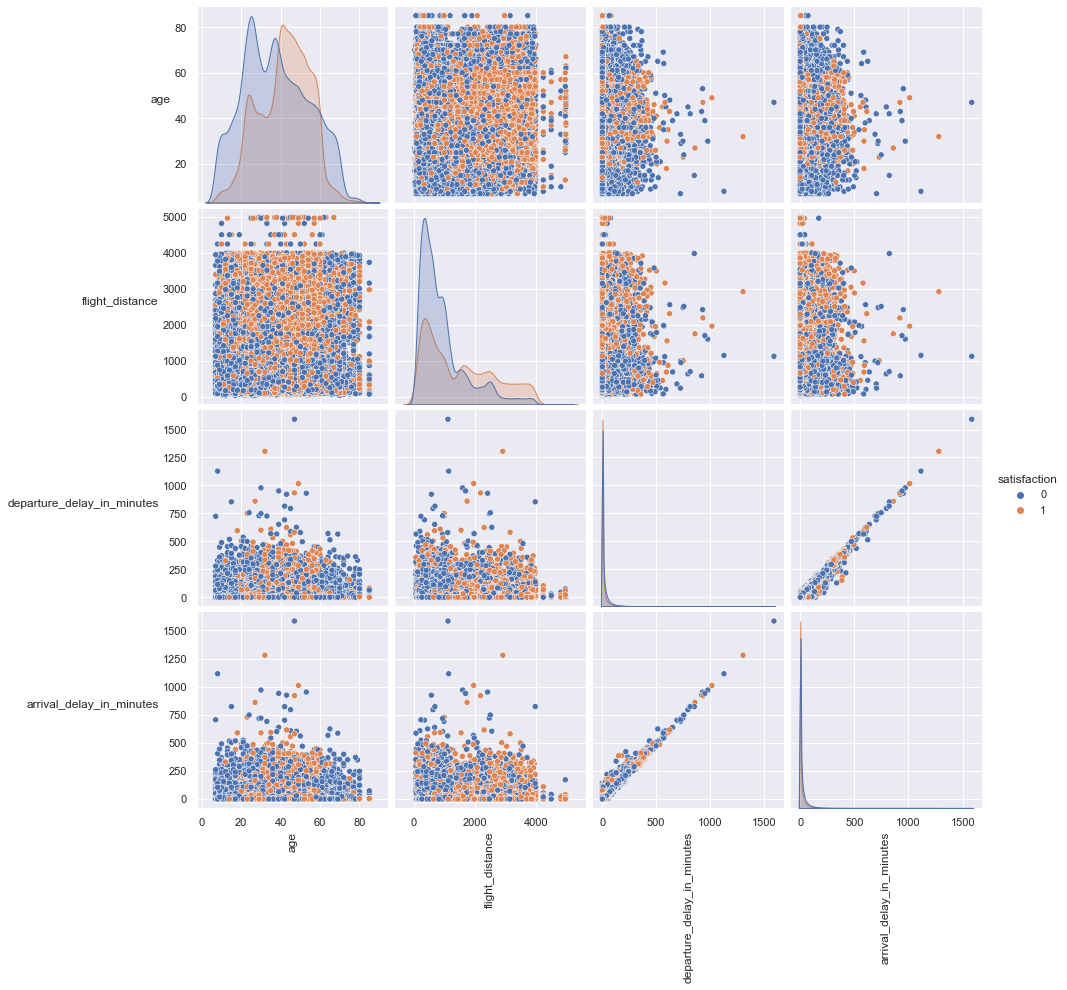

In [25]:
import seaborn as sns
sns.set()

g = sns.pairplot(airline_df[airline_continuous_features_satis], hue="satisfaction", height=3)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

The chart above displays a pair plot of the 4 continuous variables in the dataset. With the response variable of interest "satisfaction" highlighted yellow for "satisfied" (1) and blue for "neutral or dissatisfied" (0).  While it was determined that these 4 variables would be cut and discretized into categorical groupings because of outlier and leverage concerns, we deemed it important to see if there are any linear correlations between variables, evidence of multi-collinearity or obvious grouping or clustering with the satisfaction variable.  In addition, the pair plot provides the kernel density distribution to see skewness trends not directly apparent from the summary statistics.  The data shows that age is normally distributed for both "satisfied" and "neutral or dissatisfied".  The majority of dissatisfied customers had longer flight distances that those vs satisfied.  This clearly shows flight distance is correlated to the response.  For departure and arrival delay, we see the vast majority of values are 0, with some outliers that are not visible from the graph.  The only variables here that show correlation are departure and arrival delay, this seems rather intuitive as a delay in departure should yield a similar delay time for arrival.  Other than this the pair plots do not reveal any insights of flight satisfaction when comparing the variables against one another.

-----


#### Correlation matrix plot for continuous variables:

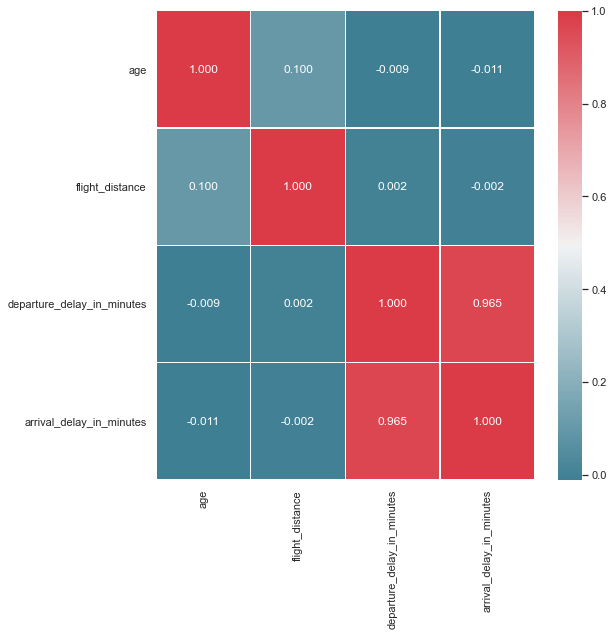

In [26]:
sns.set(style='darkgrid')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax= plt.subplots(figsize=(9,9))

sns.heatmap(airline_df[airline_continuous_features].corr(),cmap=cmap,annot=True,fmt='.3f',linewidth=.5,ax=ax)
f.tight_layout()

#### From the correlation plot and heatmap, departure delay and arrival delay are highly correlated among continuous variables.

The chart above is a heat map version comparing the continuous variables from the pairs plot. Sometimes the pair plot cannot accurately show all datapoints when looking at large datasets so its important to have a heat map to confirm the findings. The heat map is consistent with what was discovered in the pairs plot. The only variables that are strongly correlated are departure delay and arrival delay. This makes sense as flight time and speed of the plane and constant, so an increase in delay of start should yield a similar amount in delayed arrival.  From here there is obvious multicollinearity of these 2 variables, when building a model one of these should be excluded. Given that arrival delay has some missing values, this makes sense to be the variable excluded as you don’t need to remove the rows from the dataset if the variable is not used in a model.

-----

#### Correlation matrix plot for ordinal variables:

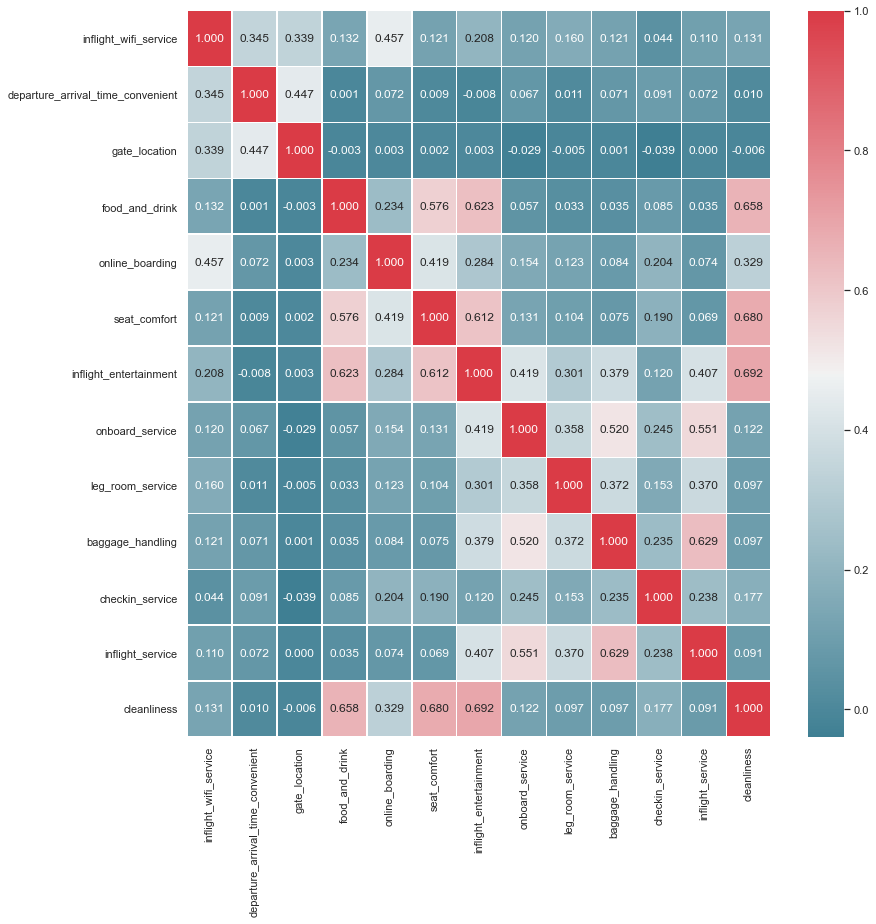

In [27]:
f, ax= plt.subplots(figsize=(13,13))
sns.heatmap(airline_df[airline_ordinal_features].corr(),cmap=cmap,annot=True,fmt='.3f',linewidth=.5,ax=ax)
f.tight_layout()

#### Airline cleaness rating is highly correlated with food and drink, seat comfort and inflight enternainment ratings.

The final chart in this section is a heat map correlation chart comparing all of the ordinal ranked variables.  While these are not exactly continuous variables, the number ranking is not arbitrary. A one equates to the lowest ranking/dissatisfied and a five is the highest ranking for each metric.  Looking at correlations between these will help determine what variables to best include in a model to determine overall flight satisfaction.  From the chart it appears most ordinal variables are not correlated, although some do stick out:

- inflight entertainment v. cleanliness (.692)
- seat comfort v. cleanliness (.680)
- food and drink v. cleanliness (.658)
- baggage handling v. inflight service (.629)
- food and drink v. inflight_entertainment (.623)
- food and drink v. seat comfort (.576)

Cleanliness seems to be the top variable for correlation amongst the ordinals.  This will be explored in the subsequent sections to see how these combinations of variables and others expose the overall relationship to flight satisfaction.


------
------

## 7.0 Explore Attributes and Class

### Leg room v. Customer class.

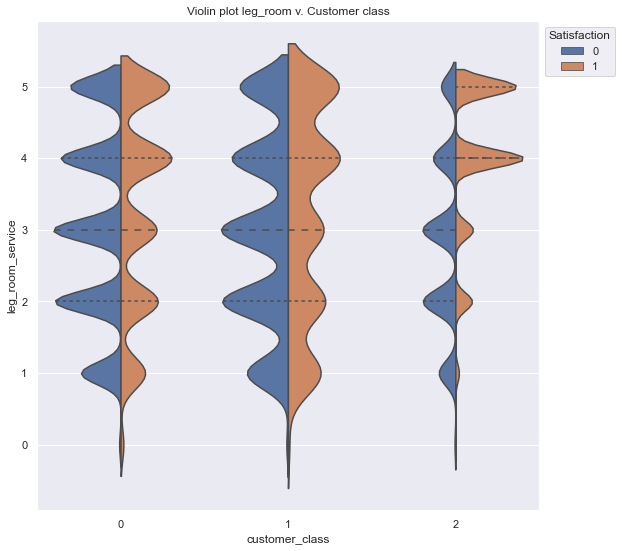

In [28]:
fig, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="customer_class", y="leg_room_service", hue="satisfaction", data=airline_df, 
               split=True, inner="quart")


plt.title('Violin plot leg_room v. Customer class')
plt.legend(title='Satisfaction', bbox_to_anchor=(1,1), loc=2)

#### Above is the violin plot of customer class VS leg room service, separated by satisfaction.

It is observed from the above violin plot that Business class passengers who rated higher leg room service also have high probability that they were satisfied their entire journeys.

It is also observed that no matter what flight class that passenger belongs to, when a customer rated the leg room service equal to or below 3, he/she was less likely to have a satisfied journey.

The violin plot shapes of Eco Plus and Eco class look like the same, which let us think the extra leg room provided by Eco Plus class didn't help improve passengers' satisfaction rating or leg room service rating. Or maybe passengers think the extra cost they spent on Eco Plus ticket was not worth the service they received.

-------

### Customer Type v. Flight distance

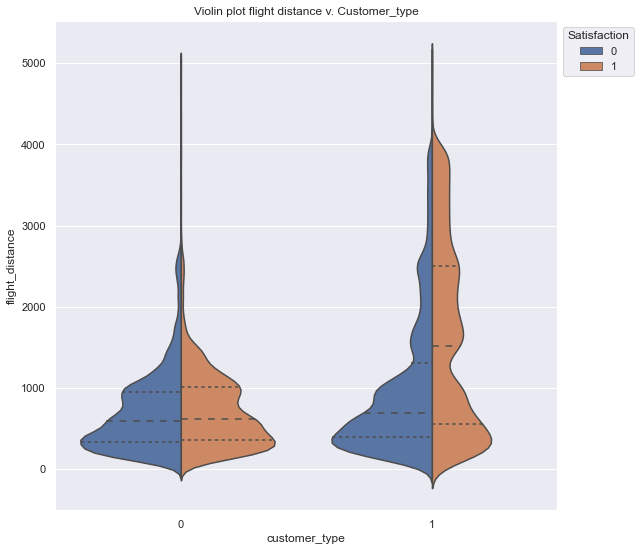

In [29]:
fig, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="customer_type", y="flight_distance", hue="satisfaction", data=airline_df, 
               split=True, inner="quart")
plt.title('Violin plot flight distance v. Customer_type')
plt.legend(title='Satisfaction', bbox_to_anchor=(1,1), loc=2)

#### Above is the violin plot of customer type VS flight distance, separated by satisfaction.

The plot shows fewer disloyal passengers took long distance flights than loyal passengers and their satisfaction rates are almost equally distributed over the flight distance.

Loyal passengers prefer to take long distance flights, passengers are more likely to be satisfied when flight distance increases.

### Cleanliness V. Seat Comfort

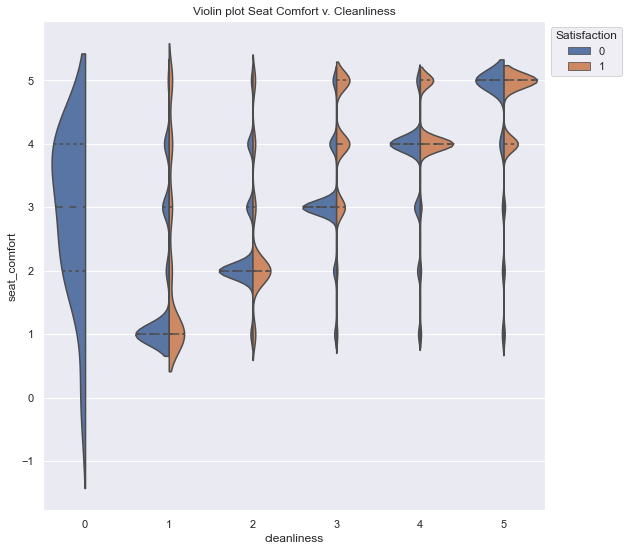

In [30]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.violinplot(x="cleanliness", y="seat_comfort", hue="satisfaction", data=airline_df, 
               split=True, inner="quart")
plt.title('Violin plot Seat Comfort v. Cleanliness')
plt.legend(title='Satisfaction', bbox_to_anchor=(1,1), loc=2)

#### Above is the violin plot of cleanliness VS seat comfort, separated by satisfaction.

It is observed from the above violin plot that when a passenger rated the flight cleanliness to zero, then he or she would not treat their flight trip satisfied. 

It is also observed that majority of the customers have the same seat comfort rating and flight cleanliness rating. When passengers gave cleanliness rating to 1, 2 or 3, they would have higher possibility to be dissatisfied during the flight trip. Even if a passenger rated flight cleanliness and seat comfort to 4 or 5, he or she may still have about 50% chance that he/she was not satisfied the entire journey.

### Age V. Customer Class, Customer Type, Type of Travel & Gender

Text(0.5, 1.0, 'Violin plot gender v. age')

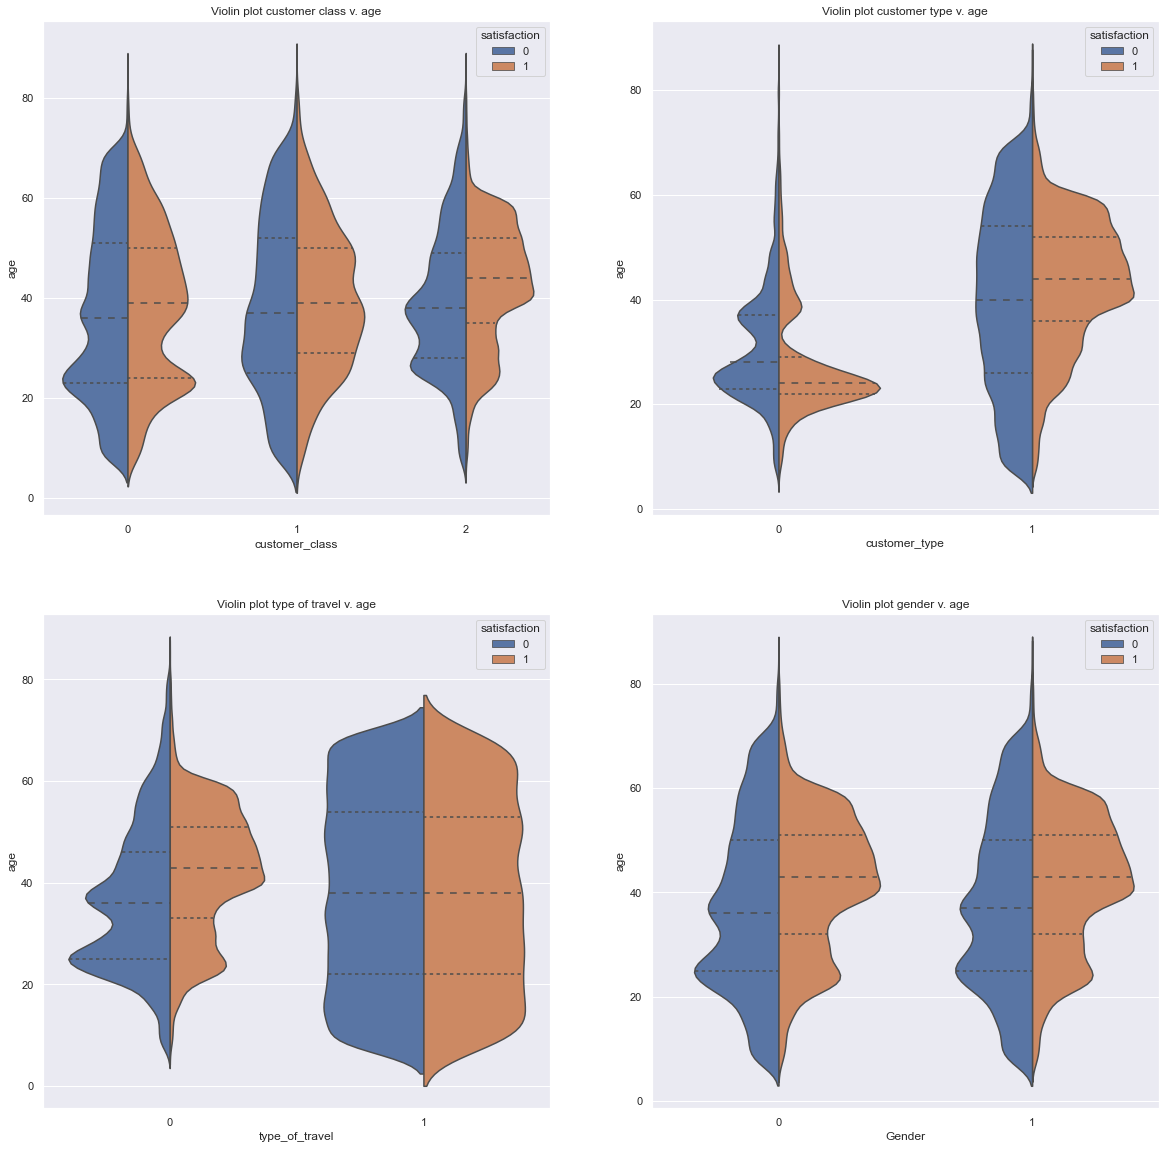

In [43]:
f, ax = plt.subplots(figsize=(20,20))
plt.subplot(2,2,1)
sns.violinplot(x="customer_class", y="age", hue="satisfaction", data=airline_df, 
               split=True, inner="quart")
plt.title('Violin plot customer class v. age')

plt.subplot(2,2,2)
sns.violinplot(x="customer_type", y="age", hue="satisfaction", data=airline_df, split=True, inner="quart")
plt.title('Violin plot customer type v. age')

plt.subplot(2,2,3)
sns.violinplot(x="type_of_travel", y="age", hue="satisfaction", data=airline_df, split=True, inner="quart")
plt.title('Violin plot type of travel v. age')

plt.subplot(2,2,4)
sns.violinplot(x="Gender", y="age", hue="satisfaction", data=airline_df, split=True, inner="quart")
plt.title('Violin plot gender v. age')


#### Above are four violin plots with each explanatory variable as one of the four categorical variables(customer class, customer type, type of travel and gender) and response variable as age, separated by satisfaction.

From the customer class v. age violin plot, it is observed that passengers in Eco class have almost the same satisfaction rate distribution over the ages. Passengers in Eco Plus class are most likely satisfied the trip whose ages are around 40 and dissatisfied the trip whose ages are around 25. Passengers in Business Class are most likely satisfied the trip whose ages are between 40 to 60 and dissatisfied the trip whose ages are between 25 to 45.

From the customer type v. age violin plot, yonger passengers are more likely to give satisfied feedback in disloyal group and older passengers are more likey to give satisfied feedback in loyal group.

From the travel type v. age violin plot, passengers who took business travel have equal possibility to rate their trip satisfied or dissatisfied through all ages. Passengers in personal travel group, older ones may have higher possibility to rate their trip satisfied.

From the gender v. age violin plot, male and female passengers have the almost same possibility that rate their trip satisfied or dissatisfied when male and female passengers have the same age.

----

### Departure Delay V. Flight Distance

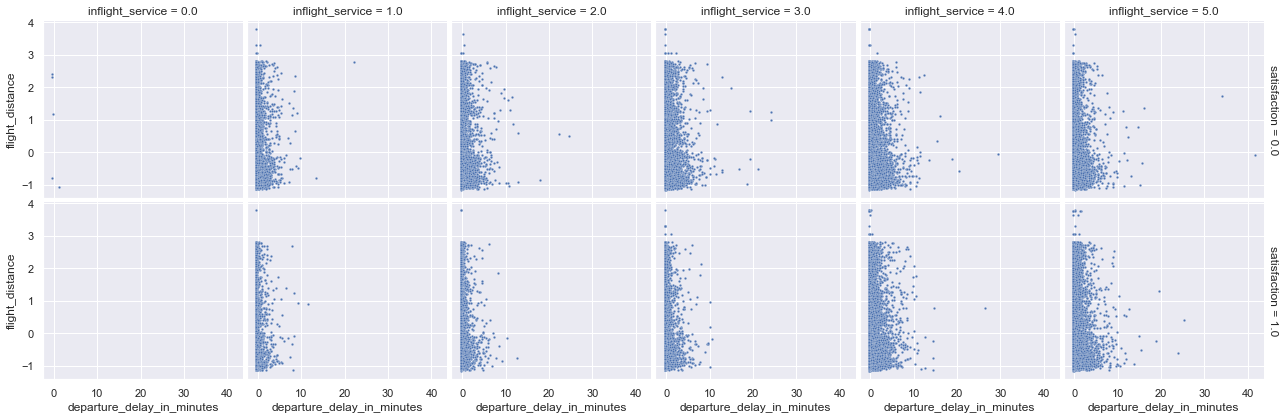

In [32]:
scaled_concat=pd.concat([airline_df['satisfaction'],scaled_cont,airline_df[airline_ordinal_features]], axis=1)

g = sns.FacetGrid(scaled_concat, row='satisfaction', col='inflight_service', height=3.0, margin_titles=True)

g.map(sns.scatterplot,'departure_delay_in_minutes','flight_distance',s=6)

g.fig.subplots_adjust(wspace=.02, hspace=.02)

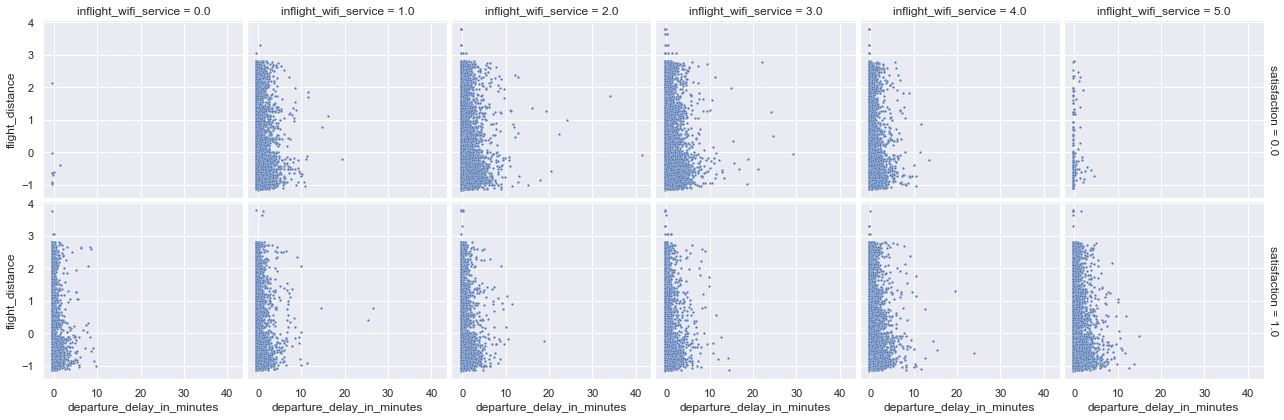

In [33]:
g = sns.FacetGrid(scaled_concat, row='satisfaction', col='inflight_wifi_service', height=3.0, margin_titles=True)

g.map(sns.scatterplot,'departure_delay_in_minutes','flight_distance',s=6)

g.fig.subplots_adjust(wspace=.02, hspace=.02)

#### Above two sactter plots are plotted against departure delay and flight distance, the rows of both plots are seprated by satisfaction. The first plot column is inflight serive rating and the second plot column is inflight wifi service rating.

From above two scatter plots, it is observed that most delays are within 500 minutes(before normalized). It's also showed that flight distance doesn't largely affect passengers' opinions about the trip. Almost no passenagers rated inflight service to 0.

What is interesting is that, if a passenger rated wifi service either to 5 or 0, he or she is less likely to be dissatisfied about the flight trip, but even if a passenger rated inflight servie to 5, he or she may still have 50% chance to be dissatisfied about the trip.

### Violin plots of Normalized Continuous Variables

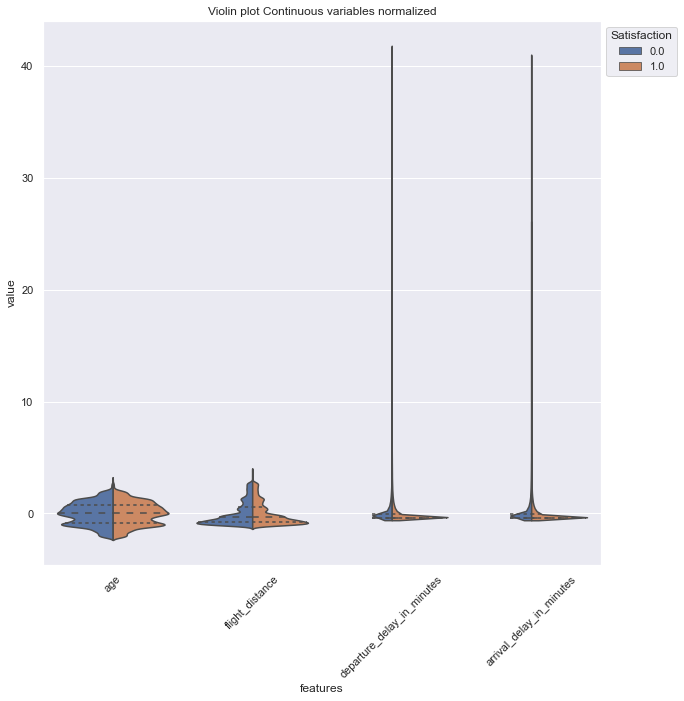

In [34]:
scaled_concat=pd.concat([airline_df['satisfaction'],scaled_cont], axis=1)
scaled_concat = pd.melt(scaled_concat, id_vars='satisfaction',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features',y='value',hue='satisfaction',data=scaled_concat, split=True, inner='quart')
plt.xticks(rotation=45)
plt.title('Violin plot Continuous variables normalized')
plt.legend(title='Satisfaction', bbox_to_anchor=(1,1), loc=2)

#### Above are the normalized violin plots of continuous variables.

We observed that departure delay and arrival delay are heavily skewed. We are not able to classify the satisfaction easily by using only age or flight distance as satisfaction rate are almost evenly distributed.

Lower delay minutes or no delays yield higher satisfaction rate, but due to large amount of data show the flights are on time, we still need to seek other variables as potential predictors. 

From the correlation plot earlier, departure delay and arrival delay are correlated, so we only need to use one of the two in our models.

### Violin plots of Normalized Ordinal Variables

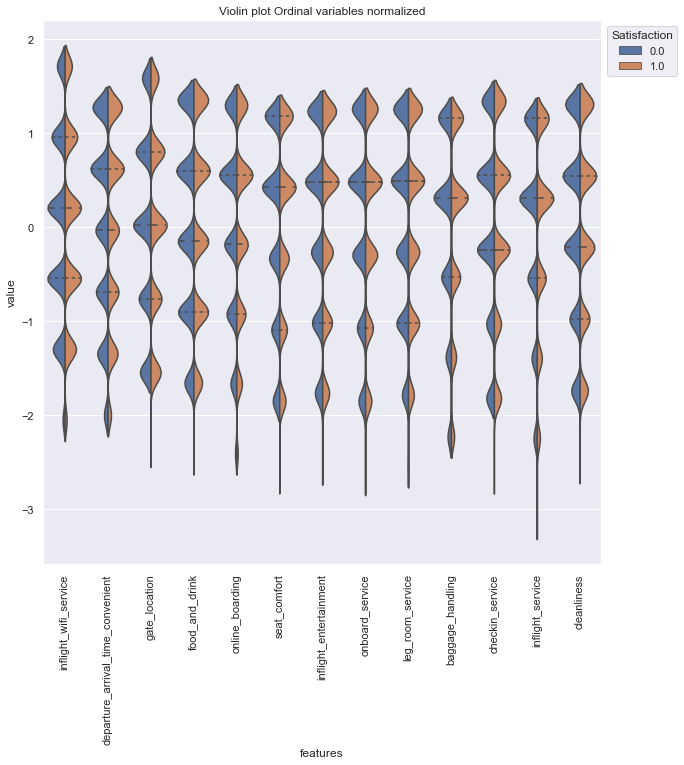

In [35]:
scaled_concat=pd.concat([airline_df['satisfaction'],scaled_ord], axis=1)
scaled_concat = pd.melt(scaled_concat, id_vars='satisfaction',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features',y='value',hue='satisfaction',data=scaled_concat, split=True, inner='quart')
plt.xticks(rotation=90)
plt.title('Violin plot Ordinal variables normalized')
plt.legend(title='Satisfaction', bbox_to_anchor=(1,1), loc=2)

#### Above are the normalized violin plots of ordinal variables.

From the plots, it's observed thhat the satisfaction ratings are symmetrically distributed in each rating level among all ordinal variables.

Thus, no significant satisfaction difference in each rating level means just use ordinal variables can't give us a good classification model.

### Violin plots of Categorical Variables

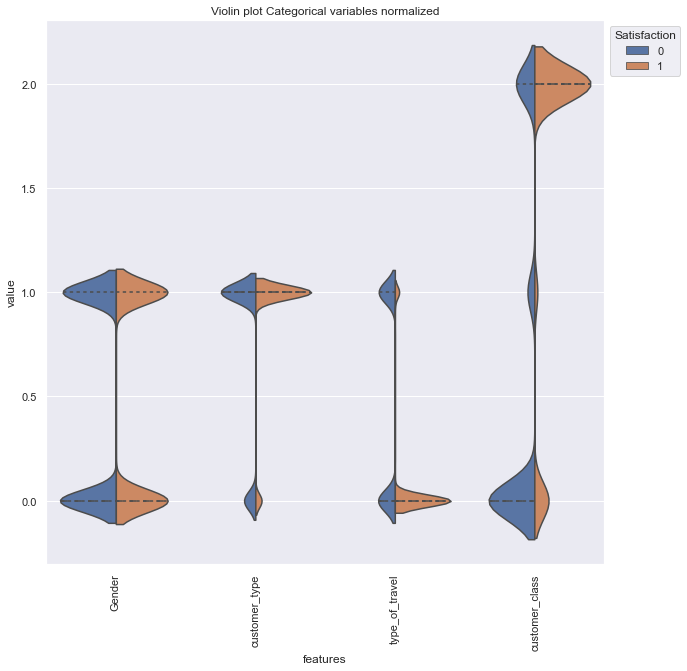

In [36]:
melt_categ = pd.melt(airline_df[airline_categ_features], id_vars='satisfaction',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x='features',y='value',hue='satisfaction',data=melt_categ, split=True, inner='quart')
plt.xticks(rotation=90)
plt.title('Violin plot Categorical variables normalized')
plt.legend(title='Satisfaction', bbox_to_anchor=(1,1), loc=2)

#### Above are the violin plot of categorical variables.

From violin plots of gender, the satisfaction ratings are symmetrically distributed on male and female groups. Thus, we are not able to classify passengers' satisfaction rating by gender variable alone.

We observed that customer type, type of travel and customer class variables are able to be used as predictors to classify satisfaction as the shapes of violin plots on each axis side have huge differences in each factor level.

----
----

## 8.0 New Features

#### School of Thought:


While it would be great to have additional features not provided in this dataset, such as airline used, type of aircraft, starting and ending destination.  These features are not available and cannot be added to the dataset.

The next approach is to create categorical buckets from our 4 continuous variables: flight distance, age, arrival delay, and departure delay.  We will create cuts that divide these into 3 or 4 factors for each continuous variable.  This also takes care of outliers that will no longer have high leverage or cook's D on the model.

We have already created cuts for age variable, let's do rest of the continuous variables.

In [37]:

airline_df['flight_range'] = pd.cut(airline_df.flight_distance,[0,750,2000,10000],3,labels=['short_distance','medium_distance',
                                                                                       'long_distance'])

airline_df['departure_delay_range'] = pd.cut(airline_df.departure_delay_in_minutes,[-1,30,90,1600],3,labels=['short_delay',
                                                                                                                'medium_delay',
                                                                                                                'long_delay'])

airline_df['arrival_delay_range'] = pd.cut(airline_df.arrival_delay_in_minutes,[-1,30,90,1600],3,labels=['short_delay',
                                                                                                            'medium_delay',
                                                                                                            'long_delay'])

flight_range={'short_distance':0,'medium_distance':1,'long_distance':2}
departure_delay_range={'short_delay':0,'medium_delay':1,'long_delay':2}
arrival_delay_range={'short_delay':0, 'medium_delay':1,'long_delay':2}

airline_df.flight_range = [flight_range[item] for item in airline_df.flight_range]
airline_df.departure_delay_range = [departure_delay_range[item] for item in airline_df.departure_delay_range]
airline_df.arrival_delay_range = [arrival_delay_range[item] for item in airline_df.arrival_delay_range]
airline_df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction,age_range,flight_range,departure_delay_range,arrival_delay_range
0,1,1,13,1,1,460,3,4,3,1,...,4,5,5,25,18.0,0,child,0,0,0
1,1,0,25,0,2,235,3,2,3,3,...,1,4,1,1,6.0,0,adult,0,0,0
2,0,1,26,0,2,1142,2,2,2,2,...,4,4,5,0,0.0,1,adult,1,0,0
3,0,1,25,0,2,562,2,5,5,5,...,1,4,2,11,9.0,0,adult,0,0,0
4,1,1,61,0,2,214,3,3,3,3,...,3,3,3,0,0.0,1,adult,0,0,0


-----
-----

## 9.0 Exceptional Work (PCA)

Dimensionality reduction is achieved through PCA. The following sections show PCA for continuous and ordinal variables to verify whether any correlated variables can be eliminated in the final model that is used for classification of the satisfaction rating.

### PCA Continuous Variables:

In [38]:
from sklearn.decomposition import PCA

pca_cont = PCA(n_components=4, svd_solver = 'auto')
Principal_components_cont=pca_cont.fit_transform(scaled_cont)
pca_df = pd.DataFrame(data = Principal_components_cont, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])
print(pca_df)

            PC 1      PC 2      PC 3      PC 4
0       0.274153 -1.749904  0.717213 -0.143643
1      -0.405450 -1.357100  0.002464  0.083448
2      -0.536767 -0.668357  0.599574 -0.005627
3      -0.164421 -1.121966  0.231938 -0.046908
4      -0.570485  0.309429 -1.695708 -0.005483
...          ...       ...       ...       ...
129482 -0.543856 -0.731310 -0.211192 -0.006709
129483 -0.532996 -1.160358  0.388573 -0.007229
129484 -0.527251 -1.311727  0.798283 -0.007190
129485 -0.524697 -1.239893  1.150494 -0.006596
129486 -0.551486 -0.543196 -0.771169 -0.006814

[129487 rows x 4 columns]


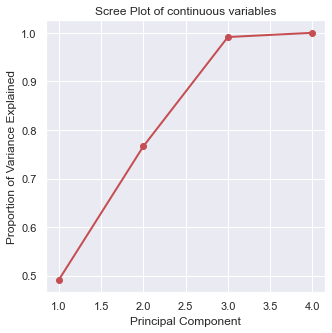

Proportion of Variance Explained :  [0.49137782 0.2749376  0.2250097  0.00867488]
Cumulative Prop. Variance Explained:  [0.49137782 0.76631541 0.99132512 1.        ]


In [39]:
PC_values_cont = np.arange(pca_cont.n_components) + 1
plt.figure(figsize=(5,5))

plt.plot(PC_values_cont, pca_cont.explained_variance_ratio_.cumsum(), 'ro-', linewidth=2)
plt.title('Scree Plot of continuous variables')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
print ("Proportion of Variance Explained : ", pca_cont.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca_cont.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

The code above shows the PCA analysis of the 4 continuous variables.  The elblow occurs after the 3rd principal component. Here 99% of the variance is observed.  This demonstartes dimensionallity reduction where not all 4 variables need to be used in a prospective model. This is inline with the heatmap correlation matrix, where departure delay is correlated tothe arrival delay.

From the Scree Plot of continuous variables, 3 PCs can explain 99% proportion of variance.

--------------

### PCA Ordinal Variables:

In [40]:
pca_ord = PCA(n_components=13, svd_solver = 'auto')
Principal_components_ord=pca_ord.fit_transform(scaled_ord)
pca_df_ord = pd.DataFrame(data = Principal_components_ord, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7'
, 'PC 8' , 'PC 9'  , 'PC 10'   , 'PC 11'  , 'PC 12' , 'PC 13'])
print(pca_df_ord)

            PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7  \
0      -2.462492  0.602047  1.020147  0.308226 -0.681509  0.687669 -1.153725   
1       3.342502 -1.299421 -0.384071 -0.274166  2.225253 -1.034707  0.401903   
2      -2.410595  1.277610  1.337478 -0.501905 -0.243106  0.571367  0.050497   
3       2.154433 -1.031114 -1.555715  1.723803  0.863814 -1.371122 -0.321098   
4      -0.707533  0.790109 -0.325215 -0.798165  0.604546 -0.304787 -0.033627   
...          ...       ...       ...       ...       ...       ...       ...   
129482 -0.893882  0.316704  1.057321 -0.212011 -0.622543  1.199875 -0.383336   
129483 -2.460177 -1.128294 -0.925693 -0.280748 -0.491893 -0.685043  0.442910   
129484  1.418394 -2.025488 -1.202387  0.881005 -2.156628 -0.371552  0.323690   
129485 -1.364225  0.023598  0.086746 -0.020374 -0.627450  1.269657  0.694534   
129486  4.193978  1.966394 -2.130230  1.371384  0.116353 -0.545607 -0.477199   

            PC 8      PC 9     PC 10   

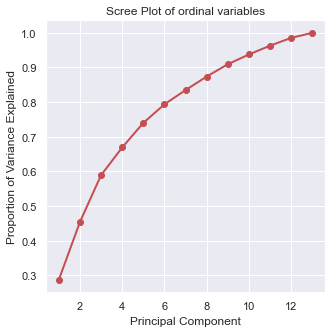

Proportion of Variance Explained :  [0.28715646 0.1670837  0.13510922 0.07990125 0.07090247 0.05364757
 0.04109563 0.0390027  0.03553723 0.02828628 0.02529568 0.02253213
 0.01444969]
Cumulative Prop. Variance Explained:  [0.28715646 0.45424016 0.58934938 0.66925063 0.7401531  0.79380066
 0.83489629 0.87389899 0.90943622 0.9377225  0.96301818 0.98555031
 1.        ]


In [41]:
PC_values_ord = np.arange(pca_ord.n_components) + 1
plt.figure(figsize=(5,5))

plt.plot(PC_values_ord, pca_ord.explained_variance_ratio_.cumsum(), 'ro-', linewidth=2)
plt.title('Scree Plot of ordinal variables')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
print ("Proportion of Variance Explained : ", pca_ord.explained_variance_ratio_)  
    
out_sum_ord = np.cumsum(pca_ord.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum_ord)

Similarly, PCA analysis was done on the 13 ordinal variables in the dataset.  Unlike the categorical variables, the numbering here is not arbitrary and is a valid candidate for PCA.  Based on the results the elbow occurs around the 9th Principal component.  Dimensionallity reduction here lowers the ordinal variable count from 13 to 9.


From the Scree Plot of ordinal variables, 9 PCs can explain 90% proportion of variance.


------
***********


From the above PCA analysis we can continue using the 3 continuous variables and 9 ordinal variables for further analysis.

### END OF REPORT